In [51]:
import pandas as pd
import matplotlib.pyplot as plt
covid = pd.read_csv("synthetic_covid19_data.csv")
print(covid)

            date      continent location  total_cases  new_cases  \
0     2021-11-19           Asia    India      6423388       2490   
1     2021-09-12  North America   Russia      6550634       6980   
2     2020-04-20         Europe   Canada      4304572       9134   
3     2022-10-16           Asia  Germany      2234489       7661   
4     2021-05-15         Europe      USA      9958614       1724   
...          ...            ...      ...          ...        ...   
2995  2022-11-09           Asia   France      7085904       1537   
2996  2020-01-24  North America    India      6699744        397   
2997  2021-02-08           Asia   France      9024327       5680   
2998  2020-02-05           Asia    India      2801445       9355   
2999  2021-06-21         Europe   Canada      9196866       4825   

      total_deaths  new_deaths  total_tests  new_tests  positive_rate  ...  \
0           107051         323     60016385       7386       0.904377  ...   
1           481184         

In [52]:
covid.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [53]:
covid.columns

Index(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients',
       'icu_patients', 'reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')

In [54]:
covid.isnull().sum()
#From the results no missing values

date                       0
continent                  0
location                   0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
new_tests                  0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
hosp_patients              0
icu_patients               0
reproduction_rate          0
stringency_index           0
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
dtype: int64

In [55]:
# Focussing on Germany in Europe
Germany_covid = covid[(covid['location'] == 'Germany')  &  (covid['continent'] == 'Europe')] 

print(Germany_covid)

            date continent location  total_cases  new_cases  total_deaths  \
80    2021-06-16    Europe  Germany      1767640       3701        415685   
101   2020-06-29    Europe  Germany      3747389       8851        494829   
107   2021-12-29    Europe  Germany      2121690       2307         91074   
124   2020-03-12    Europe  Germany      3256415       3167        330763   
144   2021-10-30    Europe  Germany      4270070       2224        459491   
...          ...       ...      ...          ...        ...           ...   
2874  2022-02-14    Europe  Germany      5720622       2600        213678   
2906  2022-06-07    Europe  Germany      6407054       3720        226118   
2920  2020-12-02    Europe  Germany      7736484        912         98537   
2984  2020-04-16    Europe  Germany       592632       9549         85501   
2991  2020-05-18    Europe  Germany      8168326       3010        492134   

      new_deaths  total_tests  new_tests  positive_rate  ...  \
80         

In [94]:
Germany_covid.loc[:, 'date'] = pd.to_datetime(Germany_covid['date'])
print(Germany_covid.dtypes)

date                        object
continent                   object
location                    object
total_cases                  int64
new_cases                    int64
total_deaths                 int64
new_deaths                   int64
total_tests                  int64
new_tests                    int64
positive_rate              float64
tests_per_case             float64
total_vaccinations           int64
people_vaccinated            int64
people_fully_vaccinated      int64
hosp_patients                int64
icu_patients                 int64
reproduction_rate          float64
stringency_index           float64
population                   int64
population_density         float64
median_age                 float64
aged_65_older              float64
aged_70_older              float64
gdp_per_capita             float64
extreme_poverty            float64
cardiovasc_death_rate      float64
diabetes_prevalence        float64
deathRate                  float64
dtype: object


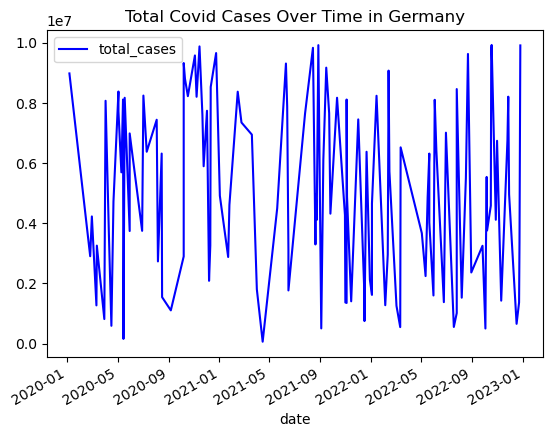

In [57]:
#The plot shows the total cases of covid in Germany over time during tragic period.
import matplotlib.pyplot as plt
Germany_covid.plot(x = 'date', y = 'total_cases', kind = 'line', color = 'blue', title = 'Total Covid Cases Over Time in Germany')

plt.show()

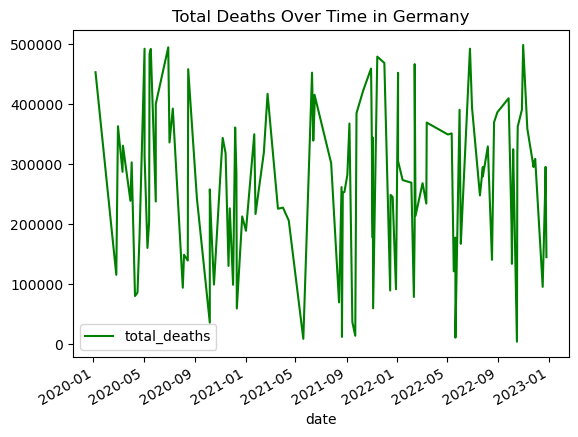

In [96]:
#Total deaths over time in Germany
Germany_covid.plot( x = 'date', y = 'total_deaths', kind = 'line', color = 'green', title = 'Total Deaths Over Time in Germany')
plt.show()

# The highest recorded was in btween  2022-09 and 2023-01, Germany

In [62]:
#Calculation of death rate of all the countries

Death_rate = covid['total_deaths'] / covid['total_cases']

print(Death_rate)

0       0.016666
1       0.073456
2       0.003512
3       0.008971
4       0.042129
          ...   
2995    0.053708
2996    0.041398
2997    0.049059
2998    0.130013
2999    0.018457
Length: 3000, dtype: float64


80      0.235164
101     0.132046
107     0.042925
124     0.101573
144     0.107607
          ...   
2874    0.037352
2906    0.035292
2920    0.012737
2984    0.144273
2991    0.060249
Length: 122, dtype: float64


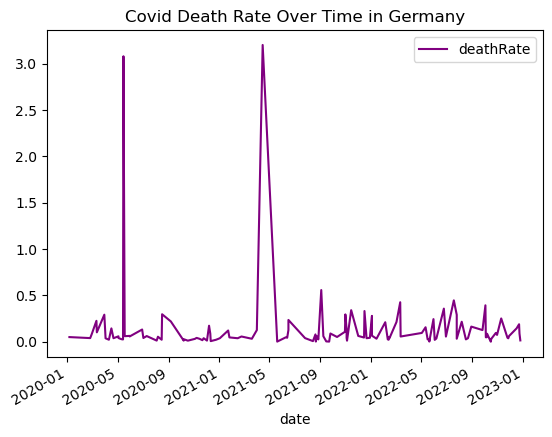

In [97]:
#Calculating death rate of Germany
Germany_covid.loc[:,'deathRate'] = Germany_covid['total_deaths'] / Germany_covid['total_cases']

print(DeathRate_Germany)

#Ploting Germany Death Rate over time

Germany_covid.plot( x = 'date', y = 'deathRate', kind = 'line', title = 'Covid Death Rate Over Time in Germany', color ='purple')

plt.show()

#The death rate was at is peak in 2021-05, Germany 


            date      continent location  total_cases  new_cases  \
837   2020-05-08           Asia  Germany      9993726       6038   
2413  2021-03-10  North America   Canada      9992154       1677   
1221  2020-01-09         Europe    Japan      9991183        861   
2427  2020-07-28         Europe       UK      9988400       4248   
1034  2022-04-16         Europe   Canada      9988209        203   

      total_deaths  new_deaths  total_tests  new_tests  positive_rate  ...  \
837         208030         717     46124553      91685       0.786297  ...   
2413        143609         832     77291965      67561       0.556968  ...   
1221        322870         636     25401119      27257       0.250508  ...   
2427          9505         140     52234859      99152       0.628468  ...   
1034        434044         897     64932348      17229       0.543287  ...   

      stringency_index  population  population_density  median_age  \
837          85.456743   256923337          383.6208

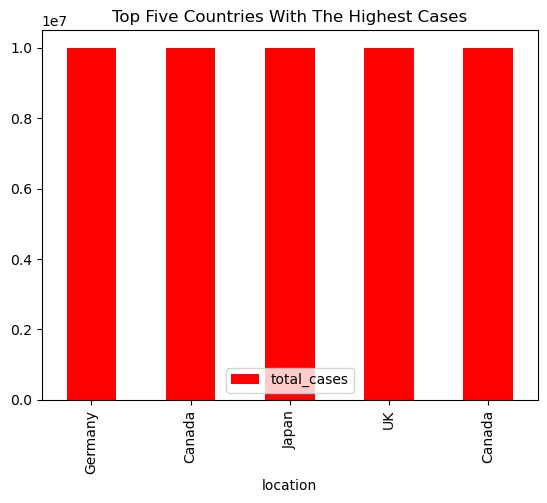

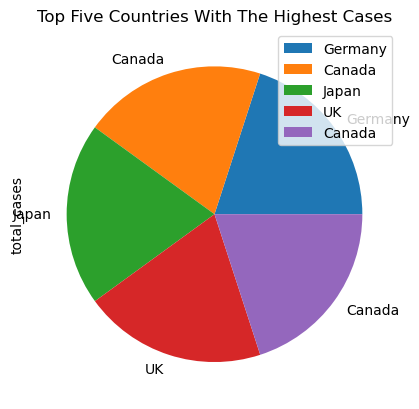

In [98]:
#Sort top 5 countries with total cases
topcountries_cases = covid.sort_values(by = 'total_cases', ascending = False).head(5)

print(topcountries_cases)

topcountries_cases.plot( x ='location', y = 'total_cases', kind = 'bar', color = 'red', title = 'Top Five Countries With The Highest Cases')
plt.show()

topcountries_cases.plot( 'location','total_cases', kind = 'pie', title = 'Top Five Countries With The Highest Cases', labels = topcountries_cases['location'])
plt.show()

# The highest  case was Germany with 9993726 cases

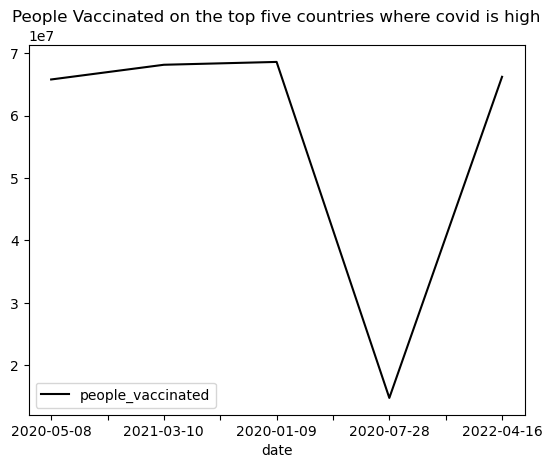

In [99]:
#People vacinated over time on the top five countries with covid cases
topcountries_cases.plot( x = 'date', y = 'people_vaccinated', color = 'black', title = 'People Vaccinated on the top five countries where covid is high')
plt.show()

#Vaccination was at peak on 2020-01-09 and on lowest on 2020-07-28

<Axes: ylabel='vaccinated_percentage'>

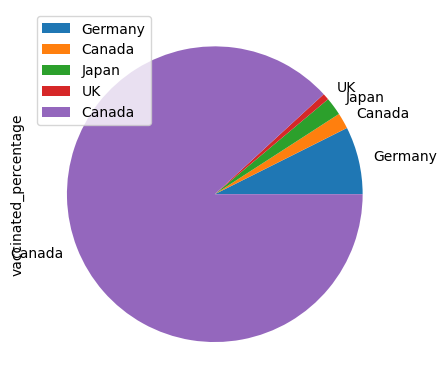

In [100]:
topcountries_cases.loc[:,'vaccinated_percentage'] = (topcountries_cases['people_vaccinated'] / topcountries_cases['population']) * 100

topcountries_cases.plot( 'location', 'vaccinated_percentage', kind = 'pie', labels = topcountries_cases['location'])

# Country with the highest number of vaccinated individuals was Canada followed by Germany then Japan, United Kingdom in that order